# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [5]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [6]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores
print

# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027209255e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [7]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [8]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

b2 max relative error: 4.447646e-11
W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


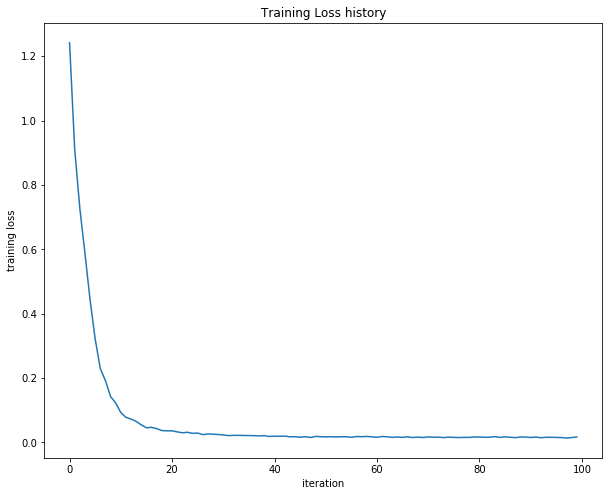

In [9]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print 'Final training loss: ', stats['loss_history'][-1]

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [3]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [11]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

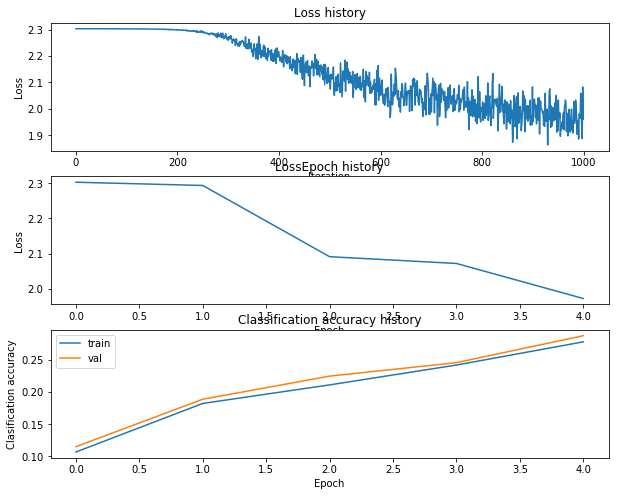

In [12]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(3, 1, 2)
plt.plot(stats['lossEpoch_history'])
plt.title('LossEpoch history')
plt.xlabel('Epoch')
plt.ylabel('Loss') 

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

Conclusion 1:Plateau shape in the loss function is an indication that weights havent been initialized properly

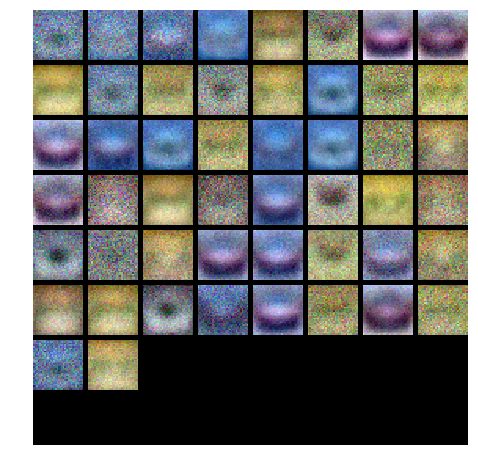

In [13]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

iteration 0 / 1000: loss 6.316629
iteration 100 / 1000: loss 3.271213
iteration 200 / 1000: loss 3.040356
iteration 300 / 1000: loss 3.037306
iteration 400 / 1000: loss 2.622136
iteration 500 / 1000: loss 2.786983
iteration 600 / 1000: loss 2.772846
iteration 700 / 1000: loss 2.439704
iteration 800 / 1000: loss 2.631774
iteration 900 / 1000: loss 2.566128
Validation accuracy:  0.403


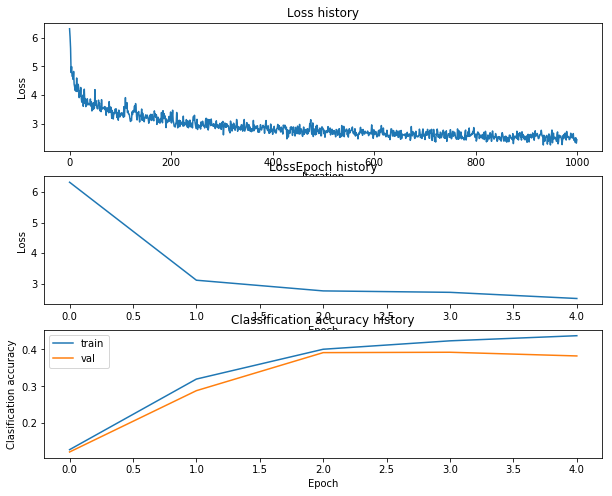

In [14]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc

# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(3, 1, 2)
plt.plot(stats['lossEpoch_history'])
plt.title('LossEpoch history')
plt.xlabel('Epoch')
plt.ylabel('Loss') 

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

Conclusion 2: After initializing with proper weights ,the accuracy goes up to 40 percent because improper weight initilization kills neurons thus stopping the gradient flow. 

iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 2.350769
iteration 200 / 1000: loss 2.121253
iteration 300 / 1000: loss 2.194019
iteration 400 / 1000: loss 1.729248
iteration 500 / 1000: loss 1.937931
iteration 600 / 1000: loss 1.890302
iteration 700 / 1000: loss 1.585294
iteration 800 / 1000: loss 1.798625
iteration 900 / 1000: loss 1.722675
Validation accuracy:  0.406


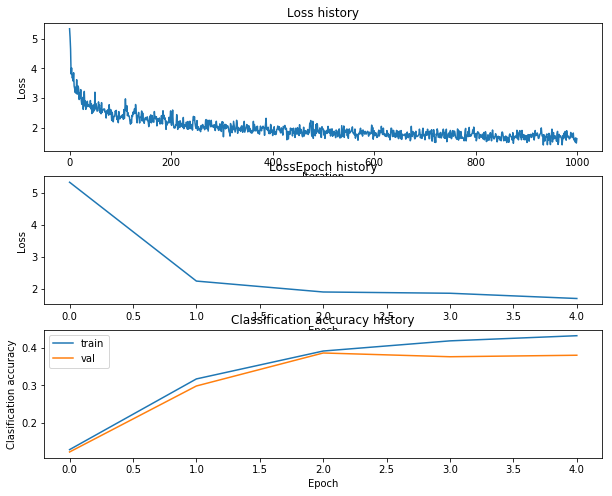

In [21]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc

# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(3, 1, 2)
plt.plot(stats['lossEpoch_history'])
plt.title('LossEpoch history')
plt.xlabel('Epoch')
plt.ylabel('Loss') 

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

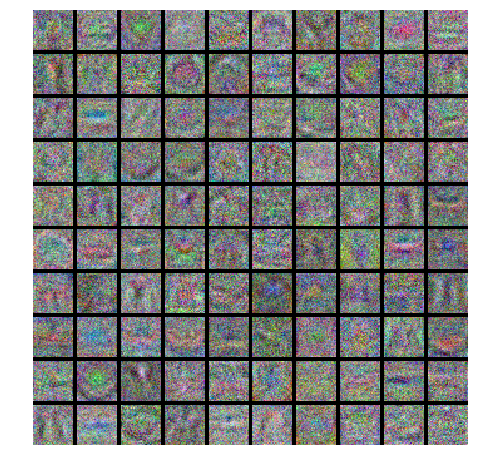

In [66]:
# visualize the weights of the best network
show_net_weights(best_net)

Tuning the Learning rate: Grid based Coarse Tuning
Since the learning rate should be considerably small,but not so small to make the training process slow,the initial interval was chose as follows for coarse tuning.

lr:  1e-05
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 3.260459
iteration 200 / 1000: loss 3.021276
iteration 300 / 1000: loss 2.926908
iteration 400 / 1000: loss 2.457121
iteration 500 / 1000: loss 2.630357
iteration 600 / 1000: loss 2.666278
iteration 700 / 1000: loss 2.073913
iteration 800 / 1000: loss 2.263435
iteration 900 / 1000: loss 2.314455
Validation accuracy:  [0.127, 0.26000000000000001, 0.28399999999999997, 0.30199999999999999, 0.317]
train accuracy:  [0.11969387755102041, 0.25071428571428572, 0.28455102040816327, 0.30485714285714288, 0.31802040816326532]


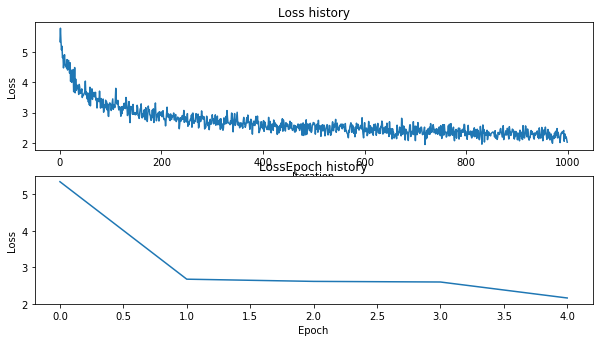

lr:  0.0001
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 2.350769
iteration 200 / 1000: loss 2.121253
iteration 300 / 1000: loss 2.194019
iteration 400 / 1000: loss 1.729248
iteration 500 / 1000: loss 1.937931
iteration 600 / 1000: loss 1.890302
iteration 700 / 1000: loss 1.585294
iteration 800 / 1000: loss 1.798625
iteration 900 / 1000: loss 1.722675
Validation accuracy:  [0.122, 0.29799999999999999, 0.38600000000000001, 0.376, 0.38]
train accuracy:  [0.12826530612244899, 0.31683673469387758, 0.39122448979591834, 0.41834693877551021, 0.43208163265306121]


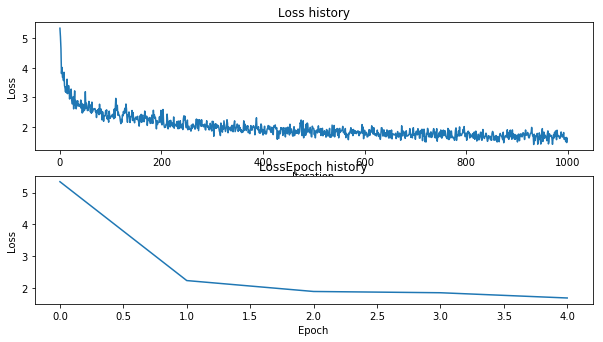

lr:  0.001
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 2.525404
iteration 200 / 1000: loss 1.655751
iteration 300 / 1000: loss 1.688601
iteration 400 / 1000: loss 1.428934
iteration 500 / 1000: loss 1.447411
iteration 600 / 1000: loss 1.571370
iteration 700 / 1000: loss 1.439103
iteration 800 / 1000: loss 1.451172
iteration 900 / 1000: loss 1.429510
Validation accuracy:  [0.107, 0.39700000000000002, 0.435, 0.47199999999999998, 0.46400000000000002]
train accuracy:  [0.11393877551020408, 0.41853061224489796, 0.45836734693877551, 0.49359183673469387, 0.49728571428571428]


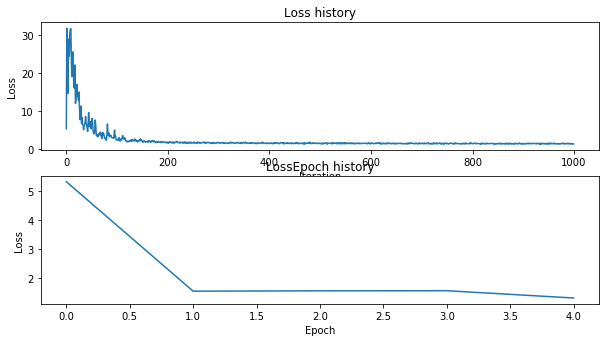

lr:  0.01
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  [0.10100000000000001, 0.088999999999999996, 0.086999999999999994, 0.086999999999999994, 0.086999999999999994]
train accuracy:  [0.10726530612244899, 0.084632653061224486, 0.10026530612244898, 0.10026530612244898, 0.10026530612244898]


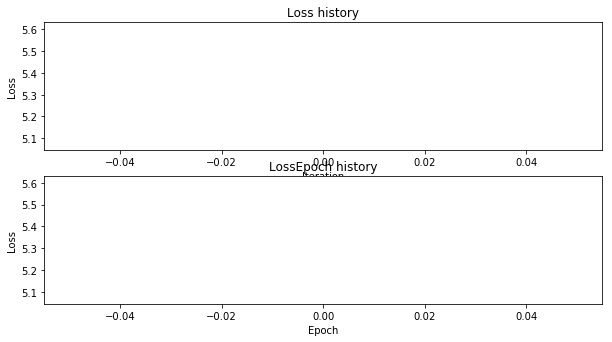

lr:  0.1
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  [0.106, 0.086999999999999994, 0.086999999999999994, 0.086999999999999994, 0.086999999999999994]
train accuracy:  [0.10755102040816326, 0.10026530612244898, 0.10026530612244898, 0.10026530612244898, 0.10026530612244898]


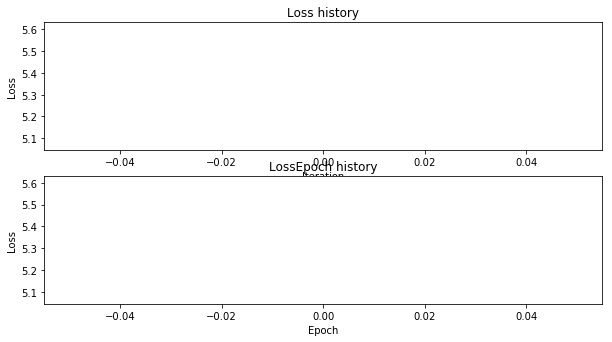

lr:  0
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 5.473153
iteration 200 / 1000: loss 5.762384
iteration 300 / 1000: loss 5.280045
iteration 400 / 1000: loss 5.565791
iteration 500 / 1000: loss 6.029597
iteration 600 / 1000: loss 6.071024
iteration 700 / 1000: loss 5.382129
iteration 800 / 1000: loss 5.021693
iteration 900 / 1000: loss 5.746823
Validation accuracy:  [0.122, 0.122, 0.122, 0.122, 0.122]
train accuracy:  [0.11620408163265306, 0.11620408163265306, 0.11620408163265306, 0.11620408163265306, 0.11620408163265306]


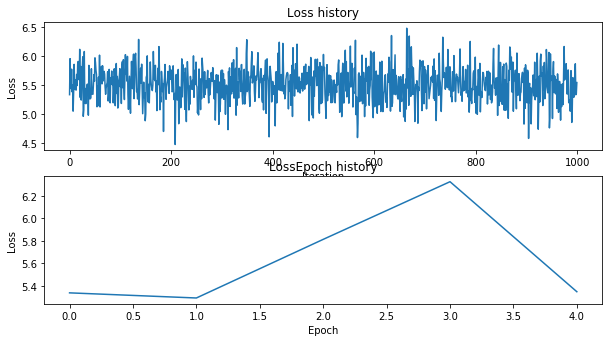

In [10]:
lr=[1e-5,1e-4,1e-3,1e-2,1e-1,0]

# Train the network
for i in lr:
    print 'lr: ',  i
    
    input_size = 32 * 32 * 3
    hidden_size = 50
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
#lr = [1e-5, 1e-4, 1e-3, 1e-2, 0, 1, 1e1, 1e2]
    
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=i, learning_rate_decay=0.95,
            reg=0, verbose=True)

# Predict
    #train_acc = (net.predict(X_train) == y_train).mean()
    #val_acc = (net.predict(X_val) == y_val).mean()
    print 'Validation accuracy: ',  stats['val_acc_history']
    print 'train accuracy: ',  stats['train_acc_history'] 
    #print "accuracy difference: ", train_acc - val_acc

# Plot the loss function and train / validation accuracies
    plt.subplot(3, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(3, 1, 2)
    plt.plot(stats['lossEpoch_history'])
    plt.title('LossEpoch history')
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.show()

Conclusion:Based on loss vs iterations/epochs graphs it was observed that the learning curves are good inthe range [1e-4,1e-3]

Random Fine Tuning in learning rate interval above

lr  0.00596634261938
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  [0.10000000000000001, 0.078, 0.068000000000000005, 0.086999999999999994, 0.086999999999999994]
train accuracy:  [0.10730612244897959, 0.093061224489795924, 0.085510204081632651, 0.10026530612244898, 0.10026530612244898]


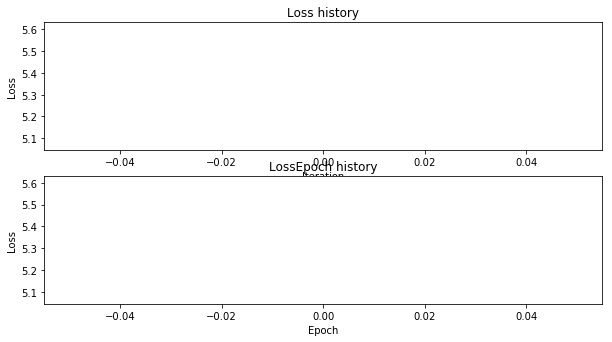

lr  0.000393349864627
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 3.722610
iteration 200 / 1000: loss 2.720742
iteration 300 / 1000: loss 2.356723
iteration 400 / 1000: loss 1.910022
iteration 500 / 1000: loss 2.006102
iteration 600 / 1000: loss 1.749084
iteration 700 / 1000: loss 1.692474
iteration 800 / 1000: loss 1.659842
iteration 900 / 1000: loss 1.648463
Validation accuracy:  [0.106, 0.309, 0.33900000000000002, 0.41199999999999998, 0.41799999999999998]
train accuracy:  [0.11720408163265306, 0.33275510204081632, 0.35944897959183675, 0.44242857142857145, 0.46848979591836737]


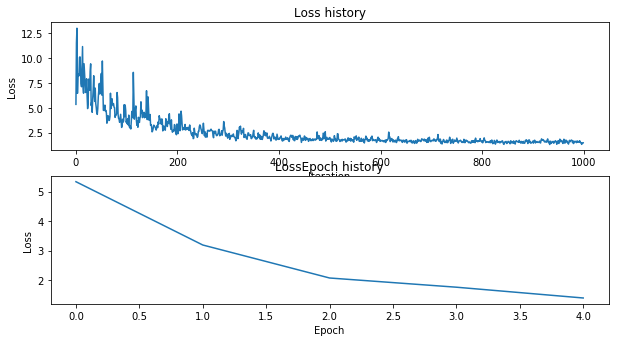

lr  0.000107381921675
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 2.297983
iteration 200 / 1000: loss 2.155574
iteration 300 / 1000: loss 2.135827
iteration 400 / 1000: loss 1.719815
iteration 500 / 1000: loss 1.897956
iteration 600 / 1000: loss 1.899594
iteration 700 / 1000: loss 1.567507
iteration 800 / 1000: loss 1.795058
iteration 900 / 1000: loss 1.705250
Validation accuracy:  [0.121, 0.30399999999999999, 0.38800000000000001, 0.39300000000000002, 0.376]
train accuracy:  [0.12816326530612246, 0.31646938775510203, 0.4022857142857143, 0.42167346938775513, 0.43616326530612243]


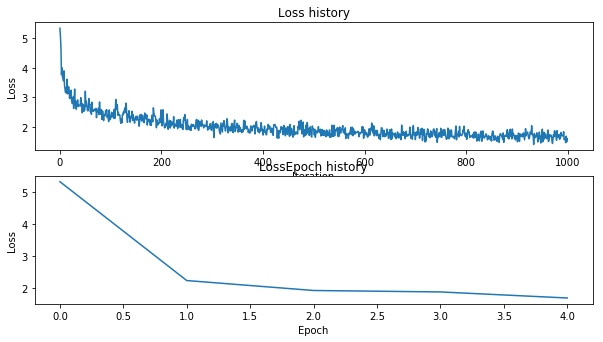

lr  0.00368443166663
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
Validation accuracy:  [0.10000000000000001, 0.12, 0.104, 0.152, 0.19]
train accuracy:  [0.1080204081632653, 0.1100204081632653, 0.11740816326530612, 0.15838775510204081, 0.17230612244897958]


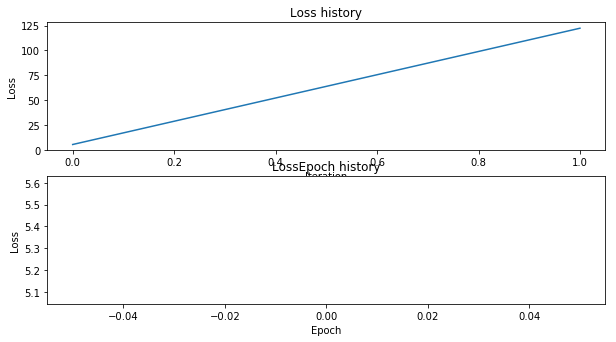

lr  0.00466287057941
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
Validation accuracy:  [0.099000000000000005, 0.087999999999999995, 0.074999999999999997, 0.10199999999999999, 0.11]
train accuracy:  [0.10759183673469387, 0.078367346938775506, 0.081918367346938775, 0.10510204081632653, 0.10597959183673469]


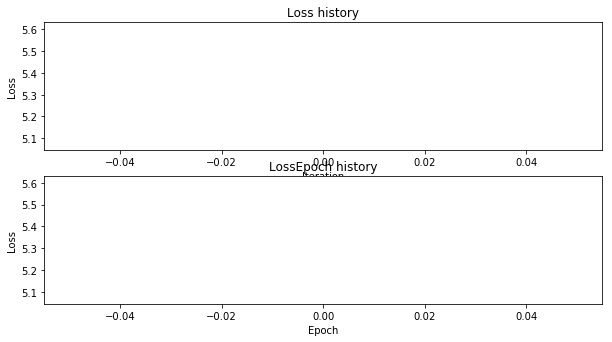

lr  0.000475617969198
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 3.532403
iteration 200 / 1000: loss 3.230945
iteration 300 / 1000: loss 2.127096
iteration 400 / 1000: loss 1.820658
iteration 500 / 1000: loss 1.833076
iteration 600 / 1000: loss 1.765471
iteration 700 / 1000: loss 1.606198
iteration 800 / 1000: loss 1.724843
iteration 900 / 1000: loss 1.610722
Validation accuracy:  [0.111, 0.29599999999999999, 0.33700000000000002, 0.41199999999999998, 0.45300000000000001]
train accuracy:  [0.11769387755102041, 0.33134693877551019, 0.37067346938775508, 0.44371428571428573, 0.48906122448979594]


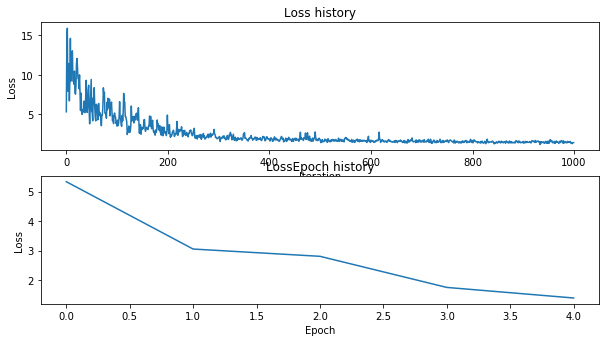

lr  0.000561606515085
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 4.209236
iteration 200 / 1000: loss 2.630392
iteration 300 / 1000: loss 1.967369
iteration 400 / 1000: loss 1.635775
iteration 500 / 1000: loss 1.720408
iteration 600 / 1000: loss 1.641657
iteration 700 / 1000: loss 1.507037
iteration 800 / 1000: loss 1.572022
iteration 900 / 1000: loss 1.538883
Validation accuracy:  [0.113, 0.32600000000000001, 0.38400000000000001, 0.435, 0.44800000000000001]
train accuracy:  [0.11730612244897959, 0.33544897959183673, 0.41444897959183674, 0.46902040816326529, 0.48818367346938774]


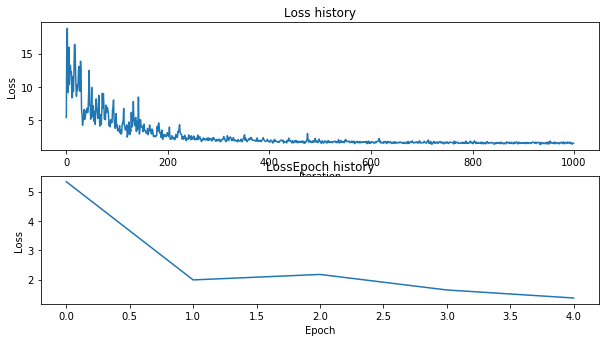

lr  0.00823862864802
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
Validation accuracy:  [0.099000000000000005, 0.113, 0.086999999999999994, 0.086999999999999994, 0.086999999999999994]
train accuracy:  [0.107, 0.099734693877551017, 0.10026530612244898, 0.10026530612244898, 0.10026530612244898]


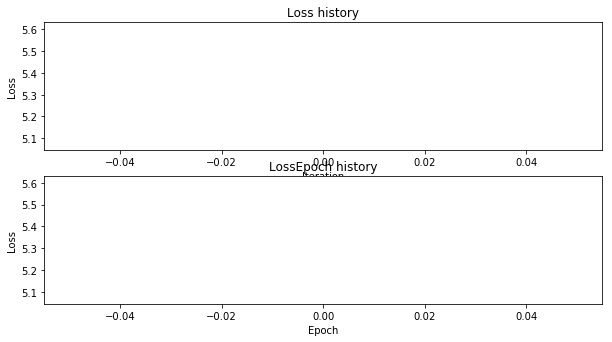

lr  0.00136661447061
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 1.767232
iteration 200 / 1000: loss 1.555887
iteration 300 / 1000: loss 1.640530
iteration 400 / 1000: loss 1.504917
iteration 500 / 1000: loss 1.409262
iteration 600 / 1000: loss 1.561178
iteration 700 / 1000: loss 1.422445
iteration 800 / 1000: loss 1.396717
iteration 900 / 1000: loss 1.427661
Validation accuracy:  [0.107, 0.378, 0.45500000000000002, 0.46899999999999997, 0.45600000000000002]
train accuracy:  [0.11189795918367347, 0.40575510204081633, 0.46293877551020407, 0.48222448979591837, 0.4919387755102041]


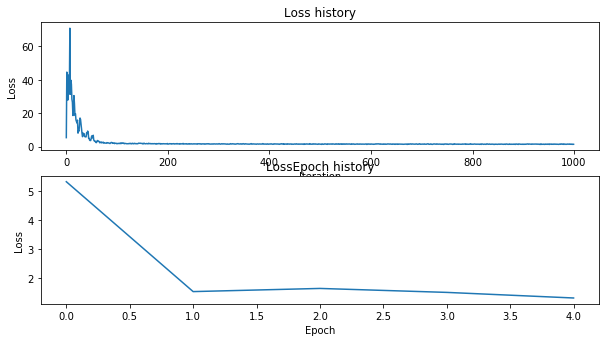

lr  0.00121241419491
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 2.002484
iteration 200 / 1000: loss 1.619496
iteration 300 / 1000: loss 1.672071
iteration 400 / 1000: loss 1.496575
iteration 500 / 1000: loss 1.423184
iteration 600 / 1000: loss 1.534213
iteration 700 / 1000: loss 1.430089
iteration 800 / 1000: loss 1.357173
iteration 900 / 1000: loss 1.418136
Validation accuracy:  [0.108, 0.39900000000000002, 0.42699999999999999, 0.46600000000000003, 0.45200000000000001]
train accuracy:  [0.11269387755102041, 0.42246938775510207, 0.4539183673469388, 0.49179591836734693, 0.49677551020408162]


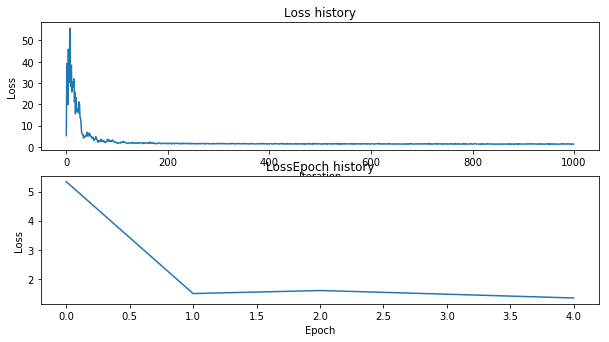

In [11]:
lr = np.random.uniform(-4,-2,10)

# Train the network
for i in lr:
    print 'lr ',  10**i
    
    input_size = 32 * 32 * 3
    hidden_size = 50
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=10**i, learning_rate_decay=0.95,
            reg=0, verbose=True)

# Predict
    #train_acc = (net.predict(X_train) == y_train).mean()
    #val_acc = (net.predict(X_val) == y_val).mean()
    #acd.append(train_acc - val_acc)
    print 'Validation accuracy: ',  stats['val_acc_history']
    print 'train accuracy: ',  stats['train_acc_history'] 
    #print "accuracy difference: ", train_acc - val_acc

# Plot the loss function and train / validation accuracies
    plt.subplot(3, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(3, 1, 2)
    plt.plot(stats['lossEpoch_history'])
    plt.title('LossEpoch history')
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.show()

Conclusion: "1e-3" is the appropriate learning rate

Tuning the model capacity i.e. no. of neuron units in the hidden layer

h_n:  50
iteration 0 / 1000: loss 5.338326
iteration 100 / 1000: loss 2.525404
iteration 200 / 1000: loss 1.655751
iteration 300 / 1000: loss 1.688601
iteration 400 / 1000: loss 1.428934
iteration 500 / 1000: loss 1.447411
iteration 600 / 1000: loss 1.571370
iteration 700 / 1000: loss 1.439103
iteration 800 / 1000: loss 1.451172
iteration 900 / 1000: loss 1.429510
Validation accuracy:  [0.107, 0.39700000000000002, 0.435, 0.47199999999999998, 0.46400000000000002]
train accuracy:  [0.11393877551020408, 0.41853061224489796, 0.45836734693877551, 0.49359183673469387, 0.49728571428571428]


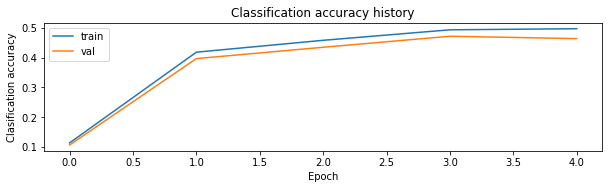

h_n:  100
iteration 0 / 1000: loss 5.002310
iteration 100 / 1000: loss 3.205964
iteration 200 / 1000: loss 1.693444
iteration 300 / 1000: loss 1.506105
iteration 400 / 1000: loss 1.500375
iteration 500 / 1000: loss 1.336389
iteration 600 / 1000: loss 1.426670
iteration 700 / 1000: loss 1.481969
iteration 800 / 1000: loss 1.437055
iteration 900 / 1000: loss 1.346147
Validation accuracy:  [0.095000000000000001, 0.39500000000000002, 0.47599999999999998, 0.46000000000000002, 0.48199999999999998]
train accuracy:  [0.11763265306122449, 0.42110204081632652, 0.50504081632653064, 0.50314285714285711, 0.53889795918367345]


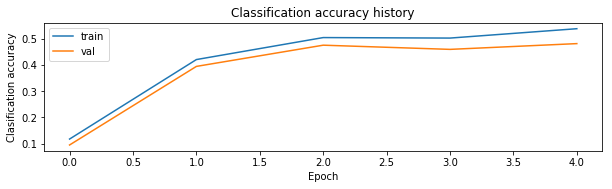

h_n:  150
iteration 0 / 1000: loss 4.096152
iteration 100 / 1000: loss 2.439202
iteration 200 / 1000: loss 1.650976
iteration 300 / 1000: loss 1.581558
iteration 400 / 1000: loss 1.380640
iteration 500 / 1000: loss 1.444114
iteration 600 / 1000: loss 1.407995
iteration 700 / 1000: loss 1.339151
iteration 800 / 1000: loss 1.357366
iteration 900 / 1000: loss 1.298549
Validation accuracy:  [0.16300000000000001, 0.433, 0.47399999999999998, 0.48899999999999999, 0.47799999999999998]
train accuracy:  [0.16463265306122449, 0.44020408163265307, 0.50063265306122451, 0.54324489795918363, 0.56308163265306121]


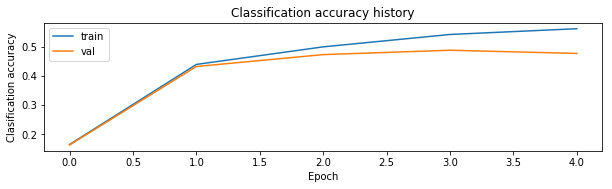

h_n:  200
iteration 0 / 1000: loss 3.825268
iteration 100 / 1000: loss 2.317967
iteration 200 / 1000: loss 1.875589
iteration 300 / 1000: loss 1.481467
iteration 400 / 1000: loss 1.666304
iteration 500 / 1000: loss 1.269990
iteration 600 / 1000: loss 1.340267
iteration 700 / 1000: loss 1.239108
iteration 800 / 1000: loss 1.403556
iteration 900 / 1000: loss 1.305625
Validation accuracy:  [0.14000000000000001, 0.42099999999999999, 0.48299999999999998, 0.5, 0.50900000000000001]
train accuracy:  [0.15030612244897959, 0.45644897959183672, 0.51932653061224487, 0.54818367346938779, 0.55963265306122445]


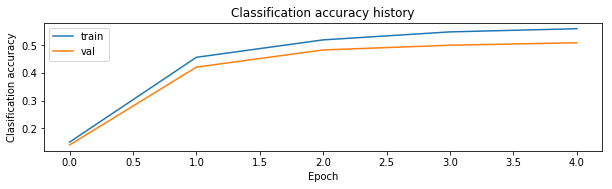

h_n:  250
iteration 0 / 1000: loss 4.057434
iteration 100 / 1000: loss 3.475524
iteration 200 / 1000: loss 1.993174
iteration 300 / 1000: loss 1.624356
iteration 400 / 1000: loss 1.514425
iteration 500 / 1000: loss 1.543753
iteration 600 / 1000: loss 1.324370
iteration 700 / 1000: loss 1.389557
iteration 800 / 1000: loss 1.250814
iteration 900 / 1000: loss 1.188403
Validation accuracy:  [0.16700000000000001, 0.41999999999999998, 0.48599999999999999, 0.49399999999999999, 0.497]
train accuracy:  [0.15420408163265306, 0.45802040816326528, 0.52236734693877551, 0.5475714285714286, 0.56842857142857139]


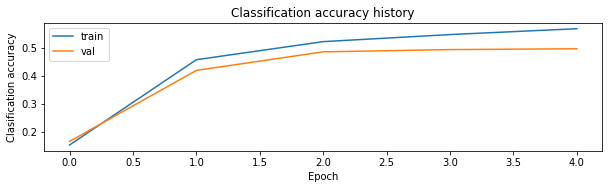

h_n:  300
iteration 0 / 1000: loss 3.182133
iteration 100 / 1000: loss 3.034863
iteration 200 / 1000: loss 2.082612
iteration 300 / 1000: loss 1.370383
iteration 400 / 1000: loss 1.291630
iteration 500 / 1000: loss 1.403694
iteration 600 / 1000: loss 1.451829
iteration 700 / 1000: loss 1.319082
iteration 800 / 1000: loss 1.248060
iteration 900 / 1000: loss 1.215191
Validation accuracy:  [0.17399999999999999, 0.38500000000000001, 0.48099999999999998, 0.48699999999999999, 0.52100000000000002]
train accuracy:  [0.18630612244897959, 0.42481632653061224, 0.51867346938775505, 0.54077551020408166, 0.58065306122448979]


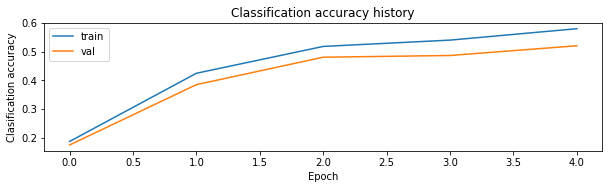

h_n:  350
iteration 0 / 1000: loss 2.834650
iteration 100 / 1000: loss 3.048224
iteration 200 / 1000: loss 1.695182
iteration 300 / 1000: loss 1.552976
iteration 400 / 1000: loss 1.369998
iteration 500 / 1000: loss 1.417439
iteration 600 / 1000: loss 1.312159
iteration 700 / 1000: loss 1.264267
iteration 800 / 1000: loss 1.323997
iteration 900 / 1000: loss 1.355078
Validation accuracy:  [0.16400000000000001, 0.434, 0.48699999999999999, 0.51400000000000001, 0.51400000000000001]
train accuracy:  [0.18095918367346939, 0.46242857142857141, 0.52304081632653066, 0.5685510204081633, 0.58791836734693881]


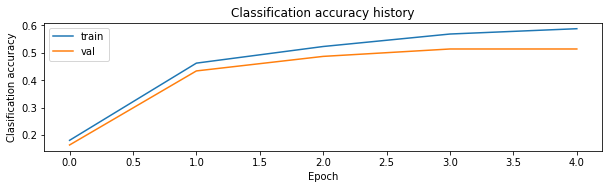

h_n:  400
iteration 0 / 1000: loss 2.966695
iteration 100 / 1000: loss 2.989253
iteration 200 / 1000: loss 2.336115
iteration 300 / 1000: loss 1.565231
iteration 400 / 1000: loss 1.383772
iteration 500 / 1000: loss 1.322507
iteration 600 / 1000: loss 1.193775
iteration 700 / 1000: loss 1.434953
iteration 800 / 1000: loss 1.174446
iteration 900 / 1000: loss 1.314177
Validation accuracy:  [0.182, 0.436, 0.505, 0.50700000000000001, 0.5]
train accuracy:  [0.18618367346938774, 0.47885714285714287, 0.54016326530612246, 0.5655510204081633, 0.58471428571428574]


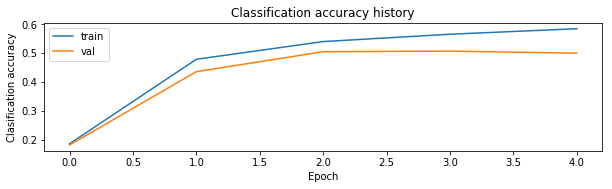

h_n:  450
iteration 0 / 1000: loss 3.246847
iteration 100 / 1000: loss 2.642717
iteration 200 / 1000: loss 2.387298
iteration 300 / 1000: loss 1.458775
iteration 400 / 1000: loss 1.345949
iteration 500 / 1000: loss 1.449562
iteration 600 / 1000: loss 1.278081
iteration 700 / 1000: loss 1.222109
iteration 800 / 1000: loss 1.219249
iteration 900 / 1000: loss 1.256250
Validation accuracy:  [0.188, 0.41099999999999998, 0.48399999999999999, 0.5, 0.51100000000000001]
train accuracy:  [0.19224489795918367, 0.46332653061224488, 0.52540816326530615, 0.5655510204081633, 0.58873469387755106]


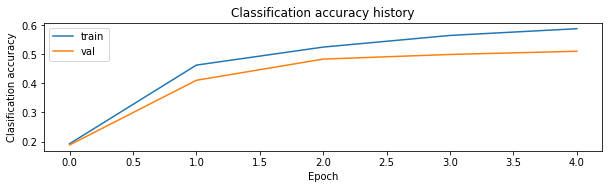

h_n:  500
iteration 0 / 1000: loss 3.020826
iteration 100 / 1000: loss 2.284874
iteration 200 / 1000: loss 1.771692
iteration 300 / 1000: loss 1.371183
iteration 400 / 1000: loss 1.331358
iteration 500 / 1000: loss 1.362988
iteration 600 / 1000: loss 1.348290
iteration 700 / 1000: loss 1.364893
iteration 800 / 1000: loss 1.349524
iteration 900 / 1000: loss 1.227372
Validation accuracy:  [0.19700000000000001, 0.434, 0.5, 0.504, 0.52500000000000002]
train accuracy:  [0.20210204081632652, 0.46636734693877552, 0.53161224489795922, 0.56638775510204087, 0.58014285714285718]


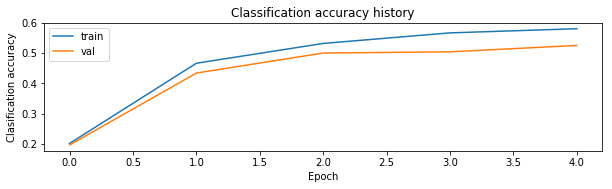

In [12]:
h_n=np.arange(50,550,50)
# Train the network
for i in h_n:
    print 'h_n: ',  i
    
    input_size = 32 * 32 * 3
    hidden_size = i
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0, verbose=True)

# Predict
    #train_acc = (net.predict(X_train) == y_train).mean()
    #val_acc = (net.predict(X_val) == y_val).mean()
    print 'Validation accuracy: ',  stats['val_acc_history']
    print 'train accuracy: ',  stats['train_acc_history'] 
    #print "accuracy difference: ", train_acc - val_acc

# Plot the loss function and train / validation accuracies

    plt.subplot(3, 1, 1)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend()
    plt.show()
    


Assumptions:
If training accuracy is increasing as no. of epochs increases,the weights are fitting the model better.
If validation accuracy is constant or increasing with training accuracy,then the model would genralize well.
If the validation accuracy decreases as training accuracy increases ,its an indication of overfitting.

Based on above assumptions,5 best curves are selected.Here h_n=[200,300,400,450,500]

Number of iterations/epochs are increased and checked if these curves tend to overfit as number of iterations are increased.

h_n:  200
iteration 0 / 2000: loss 3.825268
iteration 100 / 2000: loss 2.317967
iteration 200 / 2000: loss 1.875589
iteration 300 / 2000: loss 1.481467
iteration 400 / 2000: loss 1.666304
iteration 500 / 2000: loss 1.269990
iteration 600 / 2000: loss 1.340267
iteration 700 / 2000: loss 1.239108
iteration 800 / 2000: loss 1.403556
iteration 900 / 2000: loss 1.305625
iteration 1000 / 2000: loss 1.319294
iteration 1100 / 2000: loss 1.315121
iteration 1200 / 2000: loss 1.254149
iteration 1300 / 2000: loss 1.226687
iteration 1400 / 2000: loss 1.216838
iteration 1500 / 2000: loss 1.020947
iteration 1600 / 2000: loss 1.153204
iteration 1700 / 2000: loss 1.131292
iteration 1800 / 2000: loss 0.985785
iteration 1900 / 2000: loss 1.059226
Validation accuracy:  [0.14000000000000001, 0.42099999999999999, 0.48299999999999998, 0.5, 0.50900000000000001, 0.499, 0.497, 0.52100000000000002, 0.54000000000000004]
train accuracy:  [0.15030612244897959, 0.45644897959183672, 0.51932653061224487, 0.54818367346

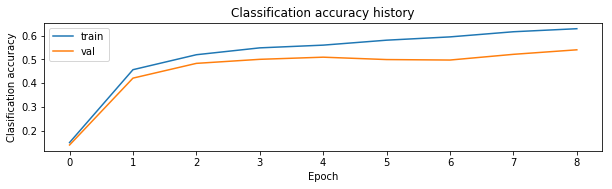

h_n:  300
iteration 0 / 2000: loss 3.182133
iteration 100 / 2000: loss 3.034863
iteration 200 / 2000: loss 2.082612
iteration 300 / 2000: loss 1.370383
iteration 400 / 2000: loss 1.291630
iteration 500 / 2000: loss 1.403694
iteration 600 / 2000: loss 1.451829
iteration 700 / 2000: loss 1.319082
iteration 800 / 2000: loss 1.248060
iteration 900 / 2000: loss 1.215191
iteration 1000 / 2000: loss 1.131057
iteration 1100 / 2000: loss 1.239461
iteration 1200 / 2000: loss 1.167461
iteration 1300 / 2000: loss 1.175289
iteration 1400 / 2000: loss 1.154266
iteration 1500 / 2000: loss 1.153842
iteration 1600 / 2000: loss 0.969445
iteration 1700 / 2000: loss 1.034081
iteration 1800 / 2000: loss 1.190322
iteration 1900 / 2000: loss 1.040876
Validation accuracy:  [0.17399999999999999, 0.38500000000000001, 0.48099999999999998, 0.48699999999999999, 0.52100000000000002, 0.504, 0.51600000000000001, 0.53000000000000003, 0.54600000000000004]
train accuracy:  [0.18630612244897959, 0.42481632653061224, 0.51

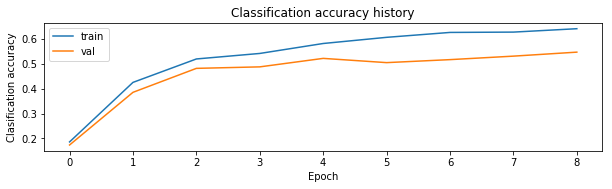

h_n:  400
iteration 0 / 2000: loss 2.966695
iteration 100 / 2000: loss 2.989253
iteration 200 / 2000: loss 2.336115
iteration 300 / 2000: loss 1.565231
iteration 400 / 2000: loss 1.383772
iteration 500 / 2000: loss 1.322507
iteration 600 / 2000: loss 1.193775
iteration 700 / 2000: loss 1.434953
iteration 800 / 2000: loss 1.174446
iteration 900 / 2000: loss 1.314177
iteration 1000 / 2000: loss 1.143380
iteration 1100 / 2000: loss 0.989742
iteration 1200 / 2000: loss 1.151573
iteration 1300 / 2000: loss 1.065232
iteration 1400 / 2000: loss 1.038477
iteration 1500 / 2000: loss 1.107043
iteration 1600 / 2000: loss 1.155003
iteration 1700 / 2000: loss 1.194390
iteration 1800 / 2000: loss 1.102629
iteration 1900 / 2000: loss 1.147528
Validation accuracy:  [0.182, 0.436, 0.505, 0.50700000000000001, 0.5, 0.497, 0.50700000000000001, 0.51400000000000001, 0.51100000000000001]
train accuracy:  [0.18618367346938774, 0.47885714285714287, 0.54016326530612246, 0.5655510204081633, 0.58471428571428574, 

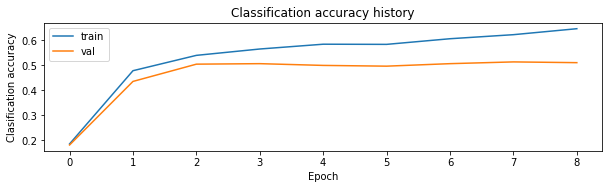

h_n:  450
iteration 0 / 2000: loss 3.246847
iteration 100 / 2000: loss 2.642717
iteration 200 / 2000: loss 2.387298
iteration 300 / 2000: loss 1.458775
iteration 400 / 2000: loss 1.345949
iteration 500 / 2000: loss 1.449562
iteration 600 / 2000: loss 1.278081
iteration 700 / 2000: loss 1.222109
iteration 800 / 2000: loss 1.219249
iteration 900 / 2000: loss 1.256250
iteration 1000 / 2000: loss 1.113150
iteration 1100 / 2000: loss 1.392069
iteration 1200 / 2000: loss 1.117957
iteration 1300 / 2000: loss 1.118378
iteration 1400 / 2000: loss 1.139215
iteration 1500 / 2000: loss 1.011762
iteration 1600 / 2000: loss 1.109710
iteration 1700 / 2000: loss 0.925904
iteration 1800 / 2000: loss 1.137526
iteration 1900 / 2000: loss 0.975914
Validation accuracy:  [0.188, 0.41099999999999998, 0.48399999999999999, 0.5, 0.51100000000000001, 0.52900000000000003, 0.51500000000000001, 0.51200000000000001, 0.54300000000000004]
train accuracy:  [0.19224489795918367, 0.46332653061224488, 0.52540816326530615,

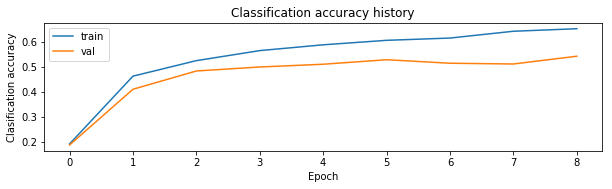

h_n:  500
iteration 0 / 2000: loss 3.020826
iteration 100 / 2000: loss 2.284874
iteration 200 / 2000: loss 1.771692
iteration 300 / 2000: loss 1.371183
iteration 400 / 2000: loss 1.331358
iteration 500 / 2000: loss 1.362988
iteration 600 / 2000: loss 1.348290
iteration 700 / 2000: loss 1.364893
iteration 800 / 2000: loss 1.349524
iteration 900 / 2000: loss 1.227372
iteration 1000 / 2000: loss 1.172834
iteration 1100 / 2000: loss 1.101812
iteration 1200 / 2000: loss 1.097421
iteration 1300 / 2000: loss 1.094609
iteration 1400 / 2000: loss 1.147711
iteration 1500 / 2000: loss 1.135495
iteration 1600 / 2000: loss 1.201260
iteration 1700 / 2000: loss 1.309612
iteration 1800 / 2000: loss 0.990958
iteration 1900 / 2000: loss 0.917490
Validation accuracy:  [0.19700000000000001, 0.434, 0.5, 0.504, 0.52500000000000002, 0.52100000000000002, 0.505, 0.51900000000000002, 0.51900000000000002]
train accuracy:  [0.20210204081632652, 0.46636734693877552, 0.53161224489795922, 0.56638775510204087, 0.5801

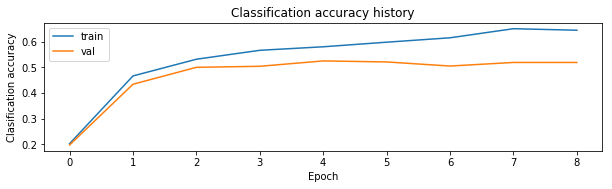

In [13]:
h_n=[200,300,400,450,500]
# Train the network
for i in h_n:
    print 'h_n: ',  i
    
    input_size = 32 * 32 * 3
    hidden_size = i
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0, verbose=True)

# Predict
    #train_acc = (net.predict(X_train) == y_train).mean()
    #val_acc = (net.predict(X_val) == y_val).mean()
    print 'Validation accuracy: ',  stats['val_acc_history']
    print 'train accuracy: ',  stats['train_acc_history'] 
    #print "accuracy difference: ", train_acc - val_acc

# Plot the loss function and train / validation accuracies

    plt.subplot(3, 1, 1)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend()
    plt.show()

Based on above assumptions,it is observed that the validation accuracy is almost the same around 50% for h_n="400"even when the iterations/epochs are increased and as the Training accuracy is increased,while the remaining curves tend to fall and rise as epochs are increased,so appropriate conclusions could not be made.
hence ,h_n=400 is selected.

The large gap between accuracies also may be an indication of overfitting.
Tuning Regularization constant.

After grid based coarse tuning in r = [0,1e-2,1e-1,1,1e1,1e2],
Random Fine tuning in r=[0,1]

r:  0.342802668504
iteration 0 / 2000: loss 3.646949
iteration 100 / 2000: loss 3.862482
iteration 200 / 2000: loss 2.683114
iteration 300 / 2000: loss 1.960519
iteration 400 / 2000: loss 1.770413
iteration 500 / 2000: loss 1.699641
iteration 600 / 2000: loss 1.579514
iteration 700 / 2000: loss 1.755462
iteration 800 / 2000: loss 1.538073
iteration 900 / 2000: loss 1.620498
iteration 1000 / 2000: loss 1.518386
iteration 1100 / 2000: loss 1.358071
iteration 1200 / 2000: loss 1.534429
iteration 1300 / 2000: loss 1.414171
iteration 1400 / 2000: loss 1.390865
iteration 1500 / 2000: loss 1.445975
iteration 1600 / 2000: loss 1.517783
iteration 1700 / 2000: loss 1.508740
iteration 1800 / 2000: loss 1.474940
iteration 1900 / 2000: loss 1.482033
Validation accuracy:  [0.182, 0.434, 0.495, 0.51500000000000001, 0.50600000000000001, 0.502, 0.51200000000000001, 0.50900000000000001, 0.53400000000000003]
train accuracy:  [0.18618367346938774, 0.47563265306122449, 0.53304081632653066, 0.55477551020408

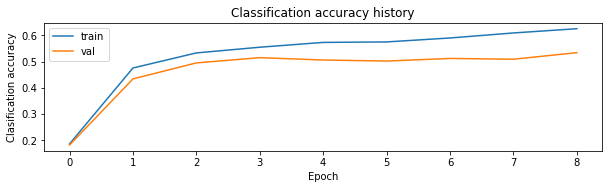

r:  0.343985617657
iteration 0 / 2000: loss 3.649296
iteration 100 / 2000: loss 3.292272
iteration 200 / 2000: loss 2.629293
iteration 300 / 2000: loss 1.939511
iteration 400 / 2000: loss 1.765915
iteration 500 / 2000: loss 1.694826
iteration 600 / 2000: loss 1.536377
iteration 700 / 2000: loss 1.756343
iteration 800 / 2000: loss 1.506198
iteration 900 / 2000: loss 1.620233
iteration 1000 / 2000: loss 1.518540
iteration 1100 / 2000: loss 1.357291
iteration 1200 / 2000: loss 1.543874
iteration 1300 / 2000: loss 1.424728
iteration 1400 / 2000: loss 1.359920
iteration 1500 / 2000: loss 1.464024
iteration 1600 / 2000: loss 1.511315
iteration 1700 / 2000: loss 1.531547
iteration 1800 / 2000: loss 1.446752
iteration 1900 / 2000: loss 1.488549
Validation accuracy:  [0.182, 0.42199999999999999, 0.504, 0.52800000000000002, 0.51000000000000001, 0.51400000000000001, 0.52300000000000002, 0.51000000000000001, 0.53200000000000003]
train accuracy:  [0.18618367346938774, 0.46169387755102043, 0.5345306

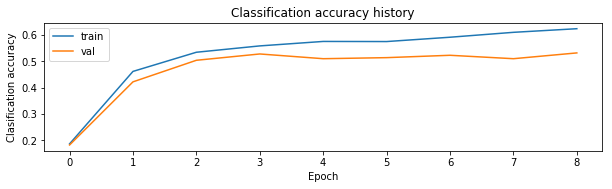

r:  0.400746605159
iteration 0 / 2000: loss 3.761932
iteration 100 / 2000: loss 4.087036
iteration 200 / 2000: loss 3.058613
iteration 300 / 2000: loss 1.988292
iteration 400 / 2000: loss 1.811579
iteration 500 / 2000: loss 1.765629
iteration 600 / 2000: loss 1.613904
iteration 700 / 2000: loss 1.769273
iteration 800 / 2000: loss 1.554433
iteration 900 / 2000: loss 1.643703
iteration 1000 / 2000: loss 1.519309
iteration 1100 / 2000: loss 1.388384
iteration 1200 / 2000: loss 1.557146
iteration 1300 / 2000: loss 1.476819
iteration 1400 / 2000: loss 1.391013
iteration 1500 / 2000: loss 1.472319
iteration 1600 / 2000: loss 1.514190
iteration 1700 / 2000: loss 1.570416
iteration 1800 / 2000: loss 1.495670
iteration 1900 / 2000: loss 1.507686
Validation accuracy:  [0.182, 0.435, 0.49199999999999999, 0.51200000000000001, 0.501, 0.503, 0.52600000000000002, 0.51700000000000002, 0.52800000000000002]
train accuracy:  [0.18618367346938774, 0.46381632653061222, 0.53902040816326535, 0.55836734693877

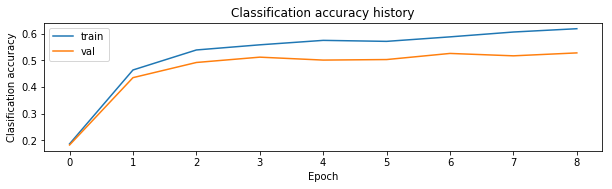

r:  0.420761613052
iteration 0 / 2000: loss 3.801650
iteration 100 / 2000: loss 3.968558
iteration 200 / 2000: loss 2.985985
iteration 300 / 2000: loss 2.009483
iteration 400 / 2000: loss 1.807501
iteration 500 / 2000: loss 1.729597
iteration 600 / 2000: loss 1.628502
iteration 700 / 2000: loss 1.796154
iteration 800 / 2000: loss 1.548244
iteration 900 / 2000: loss 1.671823
iteration 1000 / 2000: loss 1.548866
iteration 1100 / 2000: loss 1.405678
iteration 1200 / 2000: loss 1.561474
iteration 1300 / 2000: loss 1.458497
iteration 1400 / 2000: loss 1.384098
iteration 1500 / 2000: loss 1.470328
iteration 1600 / 2000: loss 1.530959
iteration 1700 / 2000: loss 1.530571
iteration 1800 / 2000: loss 1.499480
iteration 1900 / 2000: loss 1.540503
Validation accuracy:  [0.182, 0.434, 0.495, 0.52300000000000002, 0.505, 0.50600000000000001, 0.52600000000000002, 0.51500000000000001, 0.53800000000000003]
train accuracy:  [0.18618367346938774, 0.46655102040816326, 0.53769387755102038, 0.55328571428571

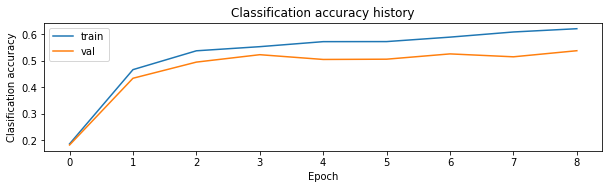

r:  0.732354249049
iteration 0 / 2000: loss 4.419971
iteration 100 / 2000: loss 4.622441
iteration 200 / 2000: loss 2.711862
iteration 300 / 2000: loss 2.136773
iteration 400 / 2000: loss 2.005393
iteration 500 / 2000: loss 1.917306
iteration 600 / 2000: loss 1.767009
iteration 700 / 2000: loss 1.899139
iteration 800 / 2000: loss 1.661273
iteration 900 / 2000: loss 1.723886
iteration 1000 / 2000: loss 1.648016
iteration 1100 / 2000: loss 1.496817
iteration 1200 / 2000: loss 1.629596
iteration 1300 / 2000: loss 1.535042
iteration 1400 / 2000: loss 1.471867
iteration 1500 / 2000: loss 1.555688
iteration 1600 / 2000: loss 1.590079
iteration 1700 / 2000: loss 1.648761
iteration 1800 / 2000: loss 1.554355
iteration 1900 / 2000: loss 1.585672
Validation accuracy:  [0.182, 0.44400000000000001, 0.48799999999999999, 0.50600000000000001, 0.497, 0.50800000000000001, 0.53000000000000003, 0.52400000000000002, 0.52300000000000002]
train accuracy:  [0.18618367346938774, 0.48116326530612247, 0.5325714

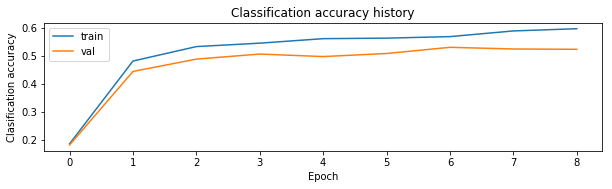

r:  1.23560299535
iteration 0 / 2000: loss 5.418611
iteration 100 / 2000: loss 4.348552
iteration 200 / 2000: loss 3.261806
iteration 300 / 2000: loss 2.375969
iteration 400 / 2000: loss 2.151399
iteration 500 / 2000: loss 2.023377
iteration 600 / 2000: loss 1.830452
iteration 700 / 2000: loss 1.911512
iteration 800 / 2000: loss 1.690950
iteration 900 / 2000: loss 1.749593
iteration 1000 / 2000: loss 1.684510
iteration 1100 / 2000: loss 1.538750
iteration 1200 / 2000: loss 1.675732
iteration 1300 / 2000: loss 1.544723
iteration 1400 / 2000: loss 1.506943
iteration 1500 / 2000: loss 1.575976
iteration 1600 / 2000: loss 1.627031
iteration 1700 / 2000: loss 1.702736
iteration 1800 / 2000: loss 1.591661
iteration 1900 / 2000: loss 1.618725
Validation accuracy:  [0.182, 0.46000000000000002, 0.496, 0.51200000000000001, 0.50800000000000001, 0.496, 0.51000000000000001, 0.52000000000000002, 0.52000000000000002]
train accuracy:  [0.18618367346938774, 0.48548979591836733, 0.52446938775510199, 0.5

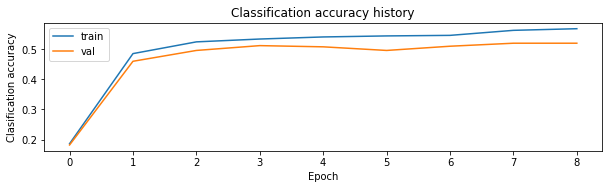

r:  0.478427300495
iteration 0 / 2000: loss 3.916081
iteration 100 / 2000: loss 3.361066
iteration 200 / 2000: loss 2.707221
iteration 300 / 2000: loss 2.069170
iteration 400 / 2000: loss 1.868159
iteration 500 / 2000: loss 1.789569
iteration 600 / 2000: loss 1.673280
iteration 700 / 2000: loss 1.807424
iteration 800 / 2000: loss 1.587062
iteration 900 / 2000: loss 1.673913
iteration 1000 / 2000: loss 1.593434
iteration 1100 / 2000: loss 1.431982
iteration 1200 / 2000: loss 1.568293
iteration 1300 / 2000: loss 1.476913
iteration 1400 / 2000: loss 1.417448
iteration 1500 / 2000: loss 1.487444
iteration 1600 / 2000: loss 1.569126
iteration 1700 / 2000: loss 1.575912
iteration 1800 / 2000: loss 1.522257
iteration 1900 / 2000: loss 1.518568
Validation accuracy:  [0.182, 0.42199999999999999, 0.49299999999999999, 0.52500000000000002, 0.498, 0.505, 0.52600000000000002, 0.52100000000000002, 0.52100000000000002]
train accuracy:  [0.18618367346938774, 0.46183673469387754, 0.53473469387755102, 0.

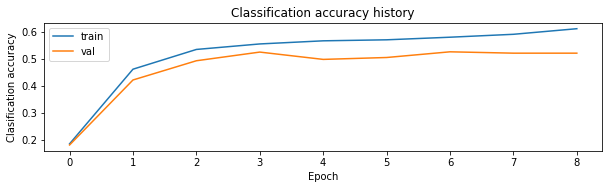

r:  0.879499869605
iteration 0 / 2000: loss 4.711965
iteration 100 / 2000: loss 5.365314
iteration 200 / 2000: loss 2.945686
iteration 300 / 2000: loss 2.286973
iteration 400 / 2000: loss 2.050393
iteration 500 / 2000: loss 1.961326
iteration 600 / 2000: loss 1.804361
iteration 700 / 2000: loss 1.926433
iteration 800 / 2000: loss 1.657088
iteration 900 / 2000: loss 1.759520
iteration 1000 / 2000: loss 1.683823
iteration 1100 / 2000: loss 1.522779
iteration 1200 / 2000: loss 1.627412
iteration 1300 / 2000: loss 1.543167
iteration 1400 / 2000: loss 1.483828
iteration 1500 / 2000: loss 1.560831
iteration 1600 / 2000: loss 1.614276
iteration 1700 / 2000: loss 1.665663
iteration 1800 / 2000: loss 1.565353
iteration 1900 / 2000: loss 1.588691
Validation accuracy:  [0.182, 0.437, 0.48799999999999999, 0.51700000000000002, 0.503, 0.50600000000000001, 0.52500000000000002, 0.51000000000000001, 0.52500000000000002]
train accuracy:  [0.18618367346938774, 0.47712244897959183, 0.53142857142857147, 0.

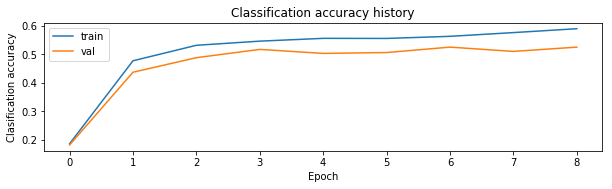

r:  0.753732304003
iteration 0 / 2000: loss 4.462393
iteration 100 / 2000: loss 3.778599
iteration 200 / 2000: loss 2.867966
iteration 300 / 2000: loss 2.271878
iteration 400 / 2000: loss 2.003751
iteration 500 / 2000: loss 1.920641
iteration 600 / 2000: loss 1.763218
iteration 700 / 2000: loss 1.920238
iteration 800 / 2000: loss 1.680023
iteration 900 / 2000: loss 1.763935
iteration 1000 / 2000: loss 1.658134
iteration 1100 / 2000: loss 1.502086
iteration 1200 / 2000: loss 1.641211
iteration 1300 / 2000: loss 1.533912
iteration 1400 / 2000: loss 1.453942
iteration 1500 / 2000: loss 1.553270
iteration 1600 / 2000: loss 1.610090
iteration 1700 / 2000: loss 1.657301
iteration 1800 / 2000: loss 1.559868
iteration 1900 / 2000: loss 1.567072
Validation accuracy:  [0.182, 0.44600000000000001, 0.48999999999999999, 0.51300000000000001, 0.50700000000000001, 0.50700000000000001, 0.53100000000000003, 0.51700000000000002, 0.52600000000000002]
train accuracy:  [0.18618367346938774, 0.47675510204081

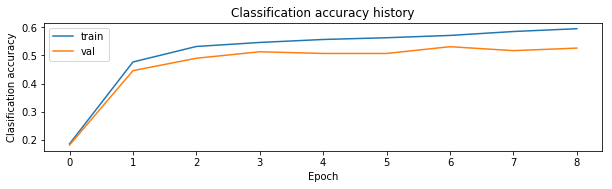

r:  0.14968871035
iteration 0 / 2000: loss 3.263736
iteration 100 / 2000: loss 3.275729
iteration 200 / 2000: loss 2.060194
iteration 300 / 2000: loss 1.780443
iteration 400 / 2000: loss 1.615323
iteration 500 / 2000: loss 1.498799
iteration 600 / 2000: loss 1.411918
iteration 700 / 2000: loss 1.597167
iteration 800 / 2000: loss 1.356072
iteration 900 / 2000: loss 1.457172
iteration 1000 / 2000: loss 1.353095
iteration 1100 / 2000: loss 1.203984
iteration 1200 / 2000: loss 1.383331
iteration 1300 / 2000: loss 1.290304
iteration 1400 / 2000: loss 1.210311
iteration 1500 / 2000: loss 1.317005
iteration 1600 / 2000: loss 1.371925
iteration 1700 / 2000: loss 1.413883
iteration 1800 / 2000: loss 1.350695
iteration 1900 / 2000: loss 1.359369
Validation accuracy:  [0.182, 0.41599999999999998, 0.48199999999999998, 0.50900000000000001, 0.51000000000000001, 0.502, 0.51300000000000001, 0.50800000000000001, 0.52100000000000002]
train accuracy:  [0.18618367346938774, 0.46065306122448979, 0.53997959

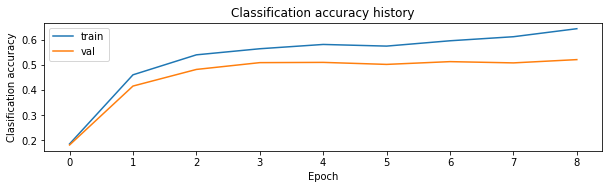

In [22]:
import random

input_size = 32 * 32 * 3
hidden_size = 400
num_classes = 10
#lr = np.random.uniform(-4,-3,10)
#r = [0,1e-2,1e-1,1,1e1,1e2]
r = np.random.uniform(0,1,10)
# Train the network
for i in r:
    print 'r: ', i
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=i, verbose=True)

# Predict
    train_acc = (net.predict(X_train) == y_train).mean()
    val_acc = (net.predict(X_val) == y_val).mean()
    print 'Validation accuracy: ',  stats['val_acc_history']
    print 'train accuracy: ', stats['train_acc_history']
    #print "accuracy difference: ", train_acc - val_acc

# Plot the loss function and train / validation accuracies

    plt.subplot(3, 1, 1)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend()
    plt.show()

FRom above r=0.5 improves the val accuracy at every point in almsot same proportions as compared to r=0 .Hence ,we choose r=0.5 

Learing rate decay was also tuned and 0.95 itself was found to be optimum.

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

From above conclusions,the appropriate parameters were found to be:
lr=1e-3,hidden neurons=400,r=0.5,iterations=2000,lr_decay=0.95,batch_size=200

iteration 0 / 2000: loss 3.958890
iteration 100 / 2000: loss 3.242699
iteration 200 / 2000: loss 2.549135
iteration 300 / 2000: loss 2.046088
iteration 400 / 2000: loss 1.893761
iteration 500 / 2000: loss 1.818923
iteration 600 / 2000: loss 1.629730
iteration 700 / 2000: loss 1.832362
iteration 800 / 2000: loss 1.626804
iteration 900 / 2000: loss 1.662616
iteration 1000 / 2000: loss 1.601953
iteration 1100 / 2000: loss 1.443374
iteration 1200 / 2000: loss 1.588390
iteration 1300 / 2000: loss 1.485854
iteration 1400 / 2000: loss 1.410866
iteration 1500 / 2000: loss 1.507244
iteration 1600 / 2000: loss 1.555246
iteration 1700 / 2000: loss 1.572301
iteration 1800 / 2000: loss 1.497418
iteration 1900 / 2000: loss 1.528372
Validation accuracy:  0.53
Test accuracy:  0.524


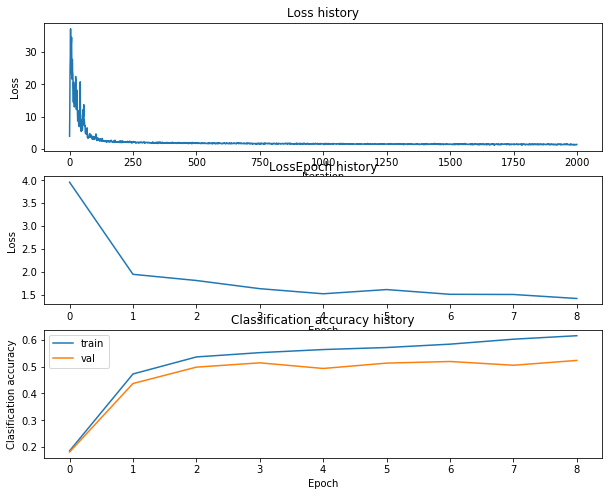

In [23]:
input_size = 32 * 32 * 3
hidden_size = 400
num_classes = 10
best_net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = best_net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set,test set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc

test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(3, 1, 2)
plt.plot(stats['lossEpoch_history'])
plt.title('LossEpoch history')
plt.xlabel('Epoch')
plt.ylabel('Loss') 

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()


In [24]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.524


Based on above conclusions,Test accuracy was found to be 52.4%